# AI in Medicine: Data Science - Basics II

## Python Programming: Data Visualisation using *matplotlib*

- **Instructor**: Moritz Seiler, AG Ritter, Charité - Universitätsmedizin Berlin (moritz.seiler@charite.de) <br>
- **Target audience**: Medical students from Charité<br>
- **Course date**: February 2021

**First, please make sure, that you're using the Python 3.6 or later kernel!**<br> You can check that in the top right corner of your browser window. If you're using a different Version go to the tab *Kernel* --> *Change Kernel* and select *Python 3.6*.

In [1]:
!python --version

Python 3.8.5


## 1. Aim of this session.

This tutorial introduces **data visualisation** in Python using ***matplotlib***. You'll learn how to create basic statistical plots using RKI's Covid-19 dataset.


## 2. Learning goals

### Theory

Data visualisation
- Definition
- Steps

### Practical

1. Data set<br>
2. matplotlib
    - Installation & Import
    - Basics in *matplotlib*
    - Workflow in *matplotlib*
    - Charting types in *matplotlib*
    - Examples 
    - Save plot
    - Exercises

## 3. References

- Data visualisation<br>
https://www.cs.unm.edu/~pgk/IVCDs14/minitufte.pdf<br>
https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/ch01.html
- matplotlib<br>
https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py<br>
https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
- RKI COVID-19 dataset for Berlin<br>
https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

## 4. Theory

See accompanying slide deck.

## 5. Pratical

### 5.1 Data set

We'll again work with the Robert-Koch-Institut (RKI) Covid-19 dataset that you already know from the previous tutorials.

*Source: Robert Koch-Institut (RKI), dl-de/by-2-0*

So let's first read in the dataset as you've learned it in the previous tutorial using the `read_csv()` function in *pandas*. Furthermore, we transform the entries in the column *Meldedatum* from string into a datetime format with the *pandas* function `to_datetime()` which allows you e.g. to do calculations with those dates.

In [5]:
# Import the Pandas and NumPy library
import pandas as pd
import numpy as np

# Read in the RKI Covid-19 data set
covid19 = pd.read_csv('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv')

# Transform string into datetime format
covid19['Meldedatum'] = pd.to_datetime(covid19['Meldedatum'])

In [6]:
covid19.head()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,"19.01.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-10-29,1001,"19.01.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-03,1001,"19.01.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00,0,1,0,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-20,1001,"19.01.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-23,1001,"19.01.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00,0,1,1,Nicht übermittelt


In [3]:
covid19.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

### 5.2 matplotlib

Matplotlib is a Python 2D plotting library which produces publication-quality figures. It was designed to serve two purposes:

1) allow for interactive, cross-platform control of figures and plots,<br>
2) make it easy to produce static raster or vector graphics files without the need for any GUIs.   

<br><br>

<center><i>"Matplotlib tries to make easy things easy and hard things possible."</center>
    
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="40%">

*Source: https://matplotlib.org/_static/logo2_compressed.svg*

### Installation

For an installation of the *matplotlib* library, you have to enter the following command in the terminal.

```python
!pip install matplotlib
```

### Importing the library

A library is imported using the command *import*. In the following, we will use the *pyplot* module, which we will call *plt*.

In [4]:
# Import the pyplot module
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

### Basics in *matplotlib*

In *matplotlib*, there are several common approaches to plotting with matplotlib:

- object-oriented API,
- *pyplot* API.
- *pylab* API *(not recommended)*

In this tutorial, we'll focus on the object-oriented approach which is recommended to use, especially when you want to create complex graphics, because it gives you more control over the figure. *Pyplot* on the other hand is just a *MATLAB*-like module of the *matplotlib* library which is mainly intended for interactive
plots and simple cases of programmatic plot generation. The syntax of both approaches is quite similiar, so if you know the object-oriented approach, you won't have a problem to work with the *pyplot* module.

Before we'll create our first plot, we need to look at the parts of a *matplotlib* figure:

-**Figure**<br>
The whole figure.<br>
-**Axes**<br>
This is what you think of as ’a plot’, it is the region of the image with the
data space. A given figure can contain many Axes, but a given Axes
object can only be in one Figure.<br>
-**Axis**<br>
These are the number-line-like objects. They take care of setting the
graph limits and generating the ticks (the marks on the axis) and
ticklabels (strings labeling the ticks)<br>
-**Artist**<br>
Basically everything you can see on the figure is an artist (even the
Figure, Axes, and Axis objects)

<img src="https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png" width="50%">

*Source: https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png*

So, let's create our first plot using *matplotlib*.

### Workflow in *matplotlib*

Plotting in *matplotlib* follows a certain rountine which includes the following steps:

1. **Prepare data**
2. **Create plot**
3. **Plot**
4. **Customise plot**
5. **Save plot**
6. **Show plot**

#### 1. Prepare data

So, let's first create a small data set for a simple visualization using *matplotlib*.

In [7]:
# Generate data set (STEP 1)
x = [1,2,3,4]
y = [1,2,3,4]

#### 2. Create a plot

When using the object-oriented approach, we have to initialize the objects *Figure* and *Axes* first. This is commonly done by calling the `pyplot.figure()` function and adding the *Axes* object via `pyplot.add_axes()`.

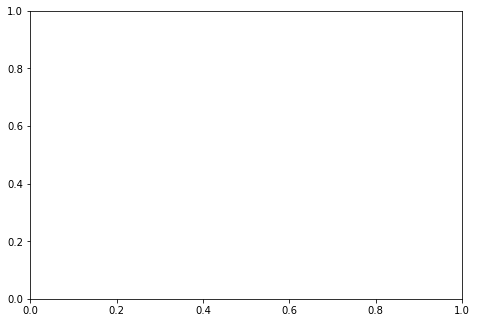

In [8]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig = plt.figure()
ax = fig.add_axes( [0, 0, 1, 1]) # [bottom, top, width, height]

Alternatively, we can use `pyplot.subplots()` to initialize both the *Figure* and the *Axes* object. You can also generate several *Axes* objects in one *Figure*.

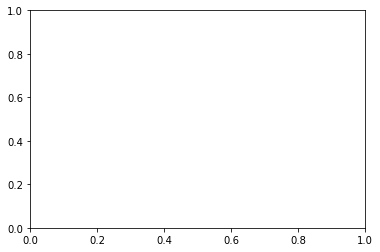

In [9]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(nrows=1, ncols=1) # 1 row, 1 column

#### 3. Plot + 4. Customise Plot

After that, we can simply use a plotting method on the *Axes* object. In this small example we're going to create a simple line graph.

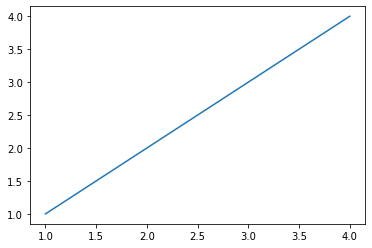

In [10]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(nrows=1, ncols=1) # 1 row, 1 column

### Step 3: Plot
ax.plot(x,y)

Before we move on, let's have a look at the *matplotlib* documentation of the line plot method:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

Alternatively, we can use the following command to open the documentation in the notebook.

In [2]:
ax.plot?

Object `ax.plot` not found.


#### Charting types in *matplotlib*

*Matplotlib* offers a huge amount of plotting methods/functions. A good starting point, so you don't have to start from scratch, is the *matplotlib* gallery, where you can find example code for some of these methods/functions (https://matplotlib.org/gallery/index.html). 

*Note: Interestingly, just about all methods of an Axes object exist as a function in the pyplot module (and vice-versa).*

A small list of *matplotlib* *Axes* methods:

- **Histogram:** ax.hist(x)
    * x: numerical (converted into categorical)
    * distribution of x
    
- **Box Plot:** ax.boxplot(x)
    * x: numerical
    * distribution of x / identification of outliers
- **Violin Plot:** ax.violinplot(x)
    * x: numerical
    * distribution of x 
- **Pie Chart:** ax.pie(x) *(not recommended)*
    * x: categorical
    * proportions of categories in x
- **Scatter Plot**:  ax.scatter(x,y)
    * x: numerical
    * y: numerical
    * joint distribution of x and y / identification of outliers
- **Line Plot**:  ax.plot(x, y)
    * x: numerical/categorical
    * y: numerical
    * function *(math.)* / time-series
- **Bar Plot**:  ax.bar(x, y) 
    * x: categorical
    * y: numerical (often count of x)
    * joint distribution of x and y / identification of outliers
- **Contour Plot**: ax.contour(X, Y, Z)
    * X: numerical
    * Y: numerical
    * Z: numerical
    * 3D surface on a 2D format
- ...

#### Examples

Let's look at some examples.

***Bar plot***

In our first example, we want to visualize the overall number of reported Covid-19 cases per state. For this, we use the variables *Bundesland* and *AnzahlFall*. Let's first have a look at those two variables.

In [12]:
covid19[['Bundesland', 'AnzahlFall']] # Step 1

,Bundesland,AnzahlFall
0,Schleswig-Holstein,1
1,Schleswig-Holstein,1
2,Schleswig-Holstein,1
3,Schleswig-Holstein,1
4,Schleswig-Holstein,1
...,...,...
1040806,Thüringen,4
1040807,Thüringen,10
1040808,Thüringen,5
1040809,Thüringen,2


We see that the each state occurs several times in our dataset. Let's add the variable *Meldedatum* and print the first 20 rows of the dataset.

In [13]:
covid19[['Bundesland', 'AnzahlFall', 'Meldedatum']].head(20)

,Bundesland,AnzahlFall,Meldedatum
0,Schleswig-Holstein,1,2020-09-30
1,Schleswig-Holstein,1,2020-10-29
2,Schleswig-Holstein,1,2020-11-03
3,Schleswig-Holstein,1,2020-11-20
4,Schleswig-Holstein,1,2020-11-23
5,Schleswig-Holstein,1,2020-12-18
6,Schleswig-Holstein,2,2021-01-06
7,Schleswig-Holstein,1,2021-01-08
8,Schleswig-Holstein,1,2021-01-09
9,Schleswig-Holstein,1,2021-01-16


We see, that we have time-series of reported cases. Since we are interested in the cumulative number of cases per state, we have to take the sum of the variable *AnzahlFall* for each state. This can simply be done by using the `groupby()` method from the *Pandas* library. We group our dataset by the variable *Bundesland* and then define the operation that is then applied to the grouped data which is the sum of the remaining variable *AnzahlFall*.

In [14]:
cases_state = covid19[['Bundesland','AnzahlFall']].groupby('Bundesland').sum() # Step 1

Let's print the result.

In [15]:
cases_state

,AnzahlFall
Bundesland,
Baden-Württemberg,275396
Bayern,377803
Berlin,113040
Brandenburg,58632
Bremen,14956
Hamburg,43073
Hessen,159342
Mecklenburg-Vorpommern,16902
Niedersachsen,129548


Here, we see that the structure of our dataframe has changed; to restore the old structure we can use the `reset_index()` method.

In [16]:
cases_state = cases_state.reset_index() # Step 1

Let's print the result again.

In [17]:
cases_state

,Bundesland,AnzahlFall
0,Baden-Württemberg,275396
1,Bayern,377803
2,Berlin,113040
3,Brandenburg,58632
4,Bremen,14956
5,Hamburg,43073
6,Hessen,159342
7,Mecklenburg-Vorpommern,16902
8,Niedersachsen,129548
9,Nordrhein-Westfalen,453475


Now, we have a dataframe with the old structure which can be used for our visualisation. So, let's use a barplot to visualise this table with states along the x-axis and the sums along the y-axis.

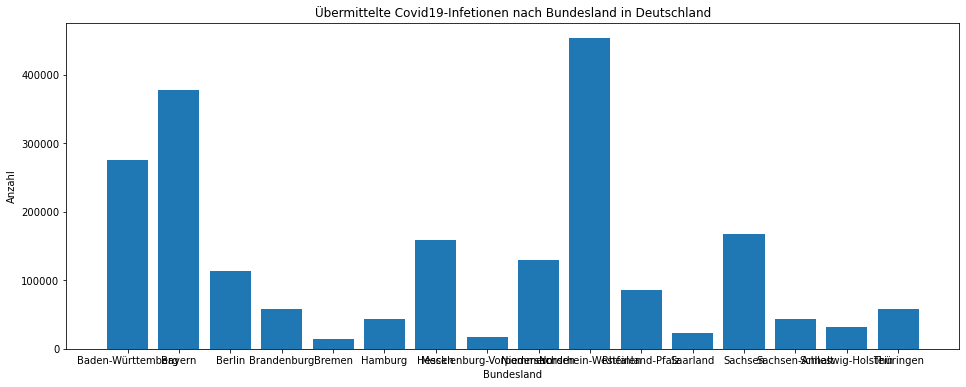

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16,6)) # Step 2
ax.bar(cases_state['Bundesland'],cases_state['AnzahlFall']) #Step 3
ax.set_xlabel('Bundesland') # Step 4
ax.set_ylabel('Anzahl')
ax.set_title('Übermittelte Covid19-Infetionen nach Bundesland in Deutschland')
plt.show() # Step 6

The x-axis is a bit messy since some of the state names are too long and overlap. So, let's flip the axes to solve this issue by using the `barh()` method for horizontal barplots.

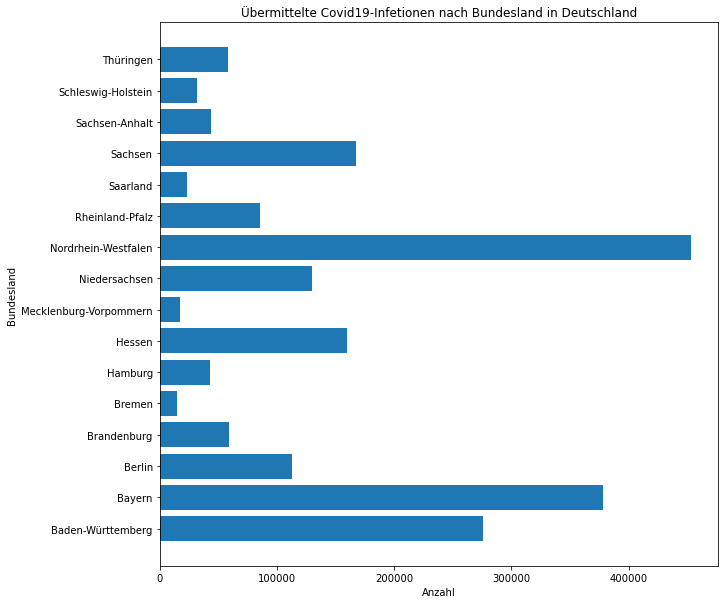

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10)) 
ax.barh(cases_state['Bundesland'],cases_state['AnzahlFall']) # barh() instead of bar()
ax.set_ylabel('Bundesland')
ax.set_xlabel('Anzahl')
ax.set_title('Übermittelte Covid19-Infetionen nach Bundesland in Deutschland')
plt.show()

This look a lot better than our vertical bar plot. To further improve the readability of this chart, we sort the states by the number of cases instead of their alphabetical order. For this, we use the `sort_values()` method. 

In [20]:
cases_state_sorted = cases_state.sort_values('AnzahlFall')
cases_state_sorted

,Bundesland,AnzahlFall
4,Bremen,14956
7,Mecklenburg-Vorpommern,16902
11,Saarland,23201
14,Schleswig-Holstein,31369
5,Hamburg,43073
13,Sachsen-Anhalt,43610
15,Thüringen,58015
3,Brandenburg,58632
10,Rheinland-Pfalz,85550
2,Berlin,113040


Let's plot the result again.

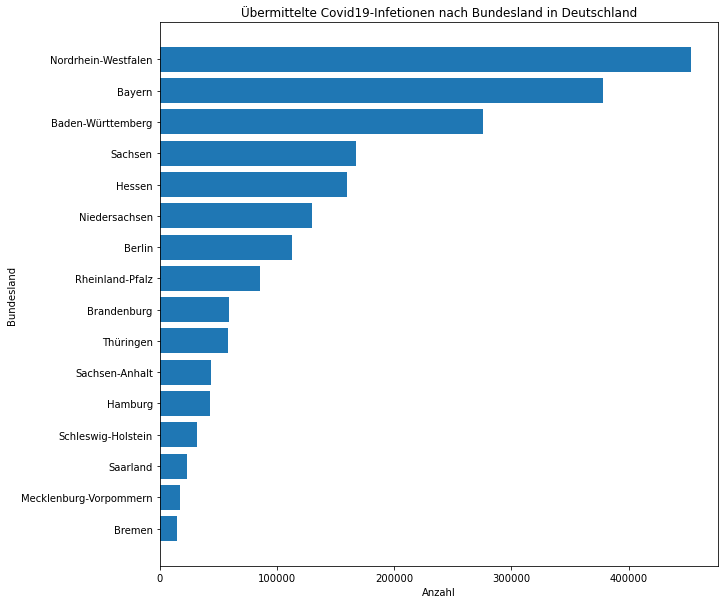

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.barh(cases_state_sorted['Bundesland'],cases_state_sorted['AnzahlFall'])
ax.set_ylabel('Bundesland') # Step 4
ax.set_xlabel('Anzahl')
ax.set_title('Übermittelte Covid19-Infetionen nach Bundesland in Deutschland')
plt.show()

In *matplotlib* you can easily overlay some plots by using multiple methods on the same *Axes* object. Let's split the confirmed number of cases into *infected*, *recovered* and *deceased* plot them in the same figure. For this task, we need the variables *Bundesland*, *AnzahlFall*, *AnzahlGenesen* und *AnzahlTodesfall*. Following the same procedure as before, we group the data by the variable *Bundesland* and add up all the cases. Then, we sort them by the variable *AnzahlFall*.

In [22]:
data_state = covid19[['Bundesland','AnzahlFall','AnzahlGenesen','AnzahlTodesfall']]
data_state = data_state.groupby('Bundesland').sum()
data_state = data_state.reset_index()
data_state_sorted = data_state.sort_values('AnzahlFall')

Let's have a look at the data.

In [23]:
data_state_sorted

,Bundesland,AnzahlFall,AnzahlGenesen,AnzahlTodesfall
4,Bremen,14956,12981,237
7,Mecklenburg-Vorpommern,16902,13363,310
11,Saarland,23201,20234,628
14,Schleswig-Holstein,31369,25061,675
5,Hamburg,43073,35139,917
13,Sachsen-Anhalt,43610,30288,1181
15,Thüringen,58015,45492,1676
3,Brandenburg,58632,46088,1667
10,Rheinland-Pfalz,85550,69071,2104
2,Berlin,113040,96747,1859


Now, we again create our *Figure* and one *Axes* object which will then be used for all plots. This way, we can simply overlay our 3 barplots by first plotting the largest bar, then the second largest and finally the smallest bars. We can do it this way because the variable *AnzahlFall* **includes** the other two variables. When overlaying the other two bar plots, we have to consider that those variables are **exclusive** which means we have to add the number of deaths to the recovered cases to report them correctly in an overlayed plot. 

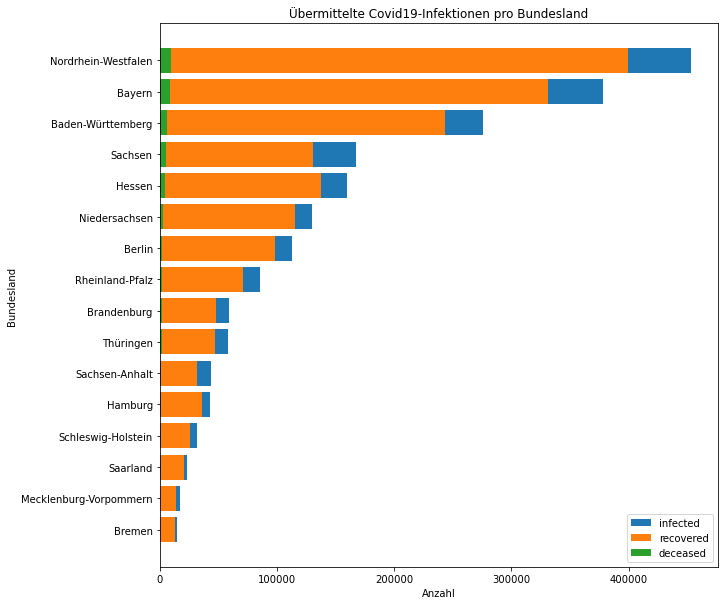

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Use same Axes object (ax) for all the 3 plots
ax.barh(data_state_sorted['Bundesland'],data_state_sorted['AnzahlFall'],label='infected')
ax.barh(data_state_sorted['Bundesland'],data_state_sorted['AnzahlGenesen']+data_state_sorted['AnzahlTodesfall'],label='recovered')
ax.barh(data_state_sorted['Bundesland'],data_state_sorted['AnzahlTodesfall'], label='deceased')
ax.set_xlabel('Anzahl')
ax.set_ylabel('Bundesland')
ax.set_title('Übermittelte Covid19-Infektionen pro Bundesland');
ax.legend()
plt.show()

***Line plot***

In the previous example, we have looked at the cumulative cases which means we haven't captured the longitudinal aspect of our data. Therefore, we will here plot the cumulative cases over time and not just at the last time point. This means, we again need the variables *Bundesland*, *Meldedatum* and *AnzahlFall* for this task. Different from the task above, we now group the data by two variables *Bundesland* and *Meldedatum* to add the cases.

In [25]:
cases = covid19[['Bundesland', 'AnzahlFall', 'Meldedatum']].groupby(['Bundesland','Meldedatum'])['AnzahlFall'].sum()

Since this gives us the sum of cases per state and date, we have to group the data again to calculate the cumulative sums per state and date.

In [26]:
cases_cum = cases.groupby(level=0).cumsum()
cases_cum = cases_cum.reset_index()

Let's have a look at the data.

In [27]:
cases_cum.head(20)

,Bundesland,Meldedatum,AnzahlFall
0,Baden-Württemberg,2020-01-07,3
1,Baden-Württemberg,2020-01-09,4
2,Baden-Württemberg,2020-01-12,5
3,Baden-Württemberg,2020-01-13,6
4,Baden-Württemberg,2020-01-15,7
5,Baden-Württemberg,2020-02-17,8
6,Baden-Württemberg,2020-02-24,9
7,Baden-Württemberg,2020-02-25,11
8,Baden-Württemberg,2020-02-26,15
9,Baden-Württemberg,2020-02-27,18


Now, we can plot the temporal evolution of Covid-19 cases for individual states (e.g. Bavaria, Berlin) by first creating subsets of the data for the corresponding state and then using the method `plot()` to create the line charts. We overlay the line charts by using the same *Axes* object.

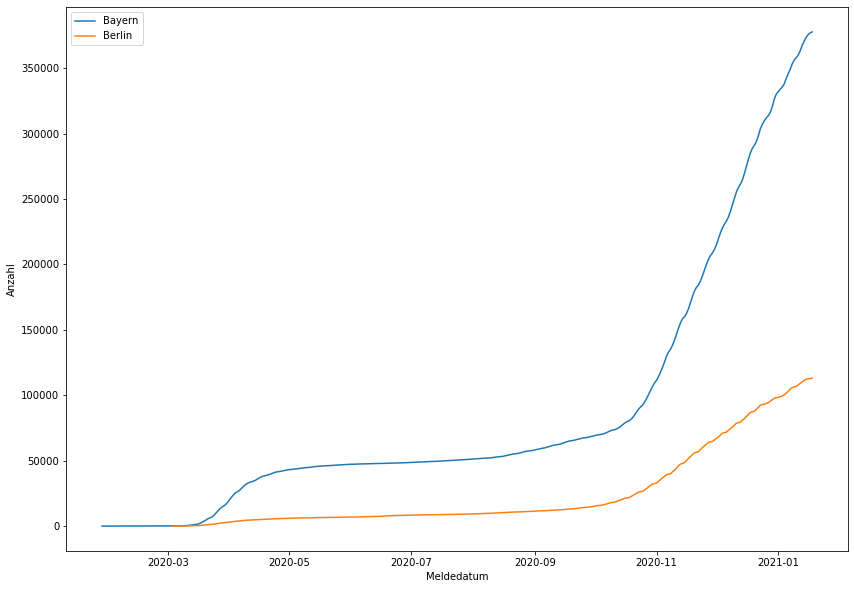

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

bavaria = cases_cum[cases_cum['Bundesland']=='Bayern']
berlin = cases_cum[cases_cum['Bundesland']=='Berlin']
ax.plot(bavaria['Meldedatum'], bavaria['AnzahlFall'], label='Bayern')
ax.plot(berlin['Meldedatum'], berlin['AnzahlFall'], label='Berlin')

ax.legend()
ax.set_xlabel('Meldedatum')
ax.set_ylabel('Anzahl')
plt.show()

If you want to plot a line for every state, you can use a *for-loop* to create the subsets and the line charts. You have to first create an array with unique state names which can be done by using *pandas* `unique()` method. 

In [29]:
states = cases_cum['Bundesland'].unique()

Then, you can simply loop through this array to create the subsets and the plots.

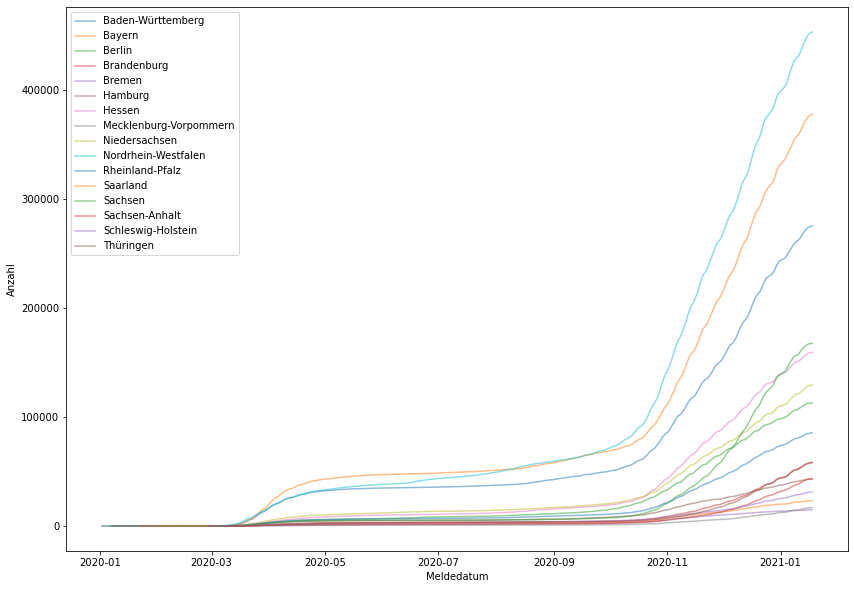

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

for state in states:
    x = cases_cum[cases_cum['Bundesland']==state]['Meldedatum']
    y = cases_cum[cases_cum['Bundesland']==state]['AnzahlFall']
    ax.plot(x,y,label=state, alpha=0.5)
    
ax.legend()
ax.set_xlabel('Meldedatum')
ax.set_ylabel('Anzahl')
plt.show()

#### 5. Save plots + 6. Show Plot

You can easily save your created figures by adding the function ```fig.savefig()``` to your code. The only argument you need to pass to the function is a complete path/just the file name (you then save it in your directory).

*Recommendation: Use vector-based graphics; so, you don't get blurry figures in your document later on (e.g. SVG, EPS, PDF)*

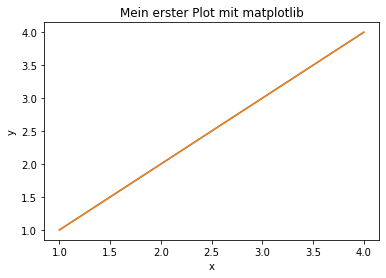

In [31]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(1, 1) # Initializing the 'Figure' and 'Axes' objects 

### Step 3: Plot
ax.plot(x,y) # Line plot 

### Step 4: Customise plot
ax.plot(x, y); 
ax.set_xlabel('x'); #  Set label for x-axis 
ax.set_ylabel('y'); # Set label for y-axis
ax.set_title('Mein erster Plot mit matplotlib'); # Set title

### Step 5: Save plot
from pathlib import Path
Path("results/week1_session3_matplotlib").mkdir(parents=True, exist_ok=True)
fig.savefig('results/week1_session3_matplotlib/line.pdf', 
            format='pdf', 
            bbox_inches = 'tight'); # bbox_inches = 'tight' created a padding around the figure

### Step 6: Show plot
plt.show()

## 6. Discusison

In this notebook, data visualisation using the *matplotlib* library was introduced. The workflow to create a plot was presented using a step-by-step introduction.

- **Data Preparation:** We selected different data features from the RKI Covid-19 dataset.
- **Create Plot:** We instantiated *Figure* and *Axes* objects.
- **Plot:** We introduced different chart types.
- **Customisation:** We added axis labels, a title and a legend to our plots.
- **Save:** We saved our plots in an arbitrary image format.



## 7. Exercises

Now, it's time for you to get your hands dirty. Please answer the following questions by choosing a **suitable graphical representation** of the data *(think about scales)* including axis labels, title and legend (if necessary).

*Tip:* The following resources might be helpful:
- www.stackoverflow.com
- matplotlib documentation: https://matplotlib.org/api/axes_api.html

1) **Create a Covid-19 subset of the states Berlin and Mecklenburg-Vorpommern.** <br>

2) **Plot the Covid-19 cases by sex in Berlin.** 

2.1 Select the required variables and store them in a separate dataframe.

2.2 Group the data by sex and take the sum of the required variable.

2.3 Plot the data.

**3) Plot the Covid-19 case fatalaty rate (CFR) by age group in Berlin and Mecklenburg-Vorpommern.**

3.1 Select the required variables and store them in a separate dataframe.

3.2 Group the data by age group and compute the CFR per age group.

3.3 Plot the data (overlay the plots for both states using 'alpha=0.5').

**4) Plot the total CFR in Berlin and Mecklenburg-Vorpommern.**

4.1 Repeat the steps from 3) without grouping the values by age groups.

4.2 Compare the results from 4.1 with the results from 3.3. What do you notice? How is that possible?

5) **Plot the number of reported daily Covid-19 infections in Berlin over time.**

5.1 Select the required variables and store them in a separate dataframe.

5.2 Group the dataframe by the required variable and use correct mathematical operation.

5.3 Reset the indices of the dataframe.

5.4 Plot the number of reported daily infections over time using a suitable plotting method.

6) **Plot the cumulative cases by age group over time.**

6.1 Select the required variables and store them in a separate dataframe.

6.2 Group the data by age group as well as reporting date and take the sum of the required variable.

6.3 Group the data again by *level=0* and take the cumulative sum.



6.4 Reset the index of the resulting dataframe.

6.5 Create an array with unique ages groups.

6.6 Loop through the age group array and plot the data.

7) **Plot the distributions of daily reported Covid-19 cases in Berlin and Brandenburg. Interpret the results.**

7.1 Calculate the daily reported number of Covid-19 infections in Berlin and Brandenburg similar to the excercises above.

7.2 Plot the distribution of daily cases for both states.

7.3 Interpret the results.

## 8. Solutions

**1) Create a Covid-19 subset of the states Berlin and Mecklenburg-Vorpommern.**

In [9]:
berlin = covid19[covid19['Bundesland']=='Berlin']
mv = covid19[covid19['Bundesland']=='Mecklenburg-Vorpommern']

**2) Plot the Covid-19 cases by sex in Berlin.**

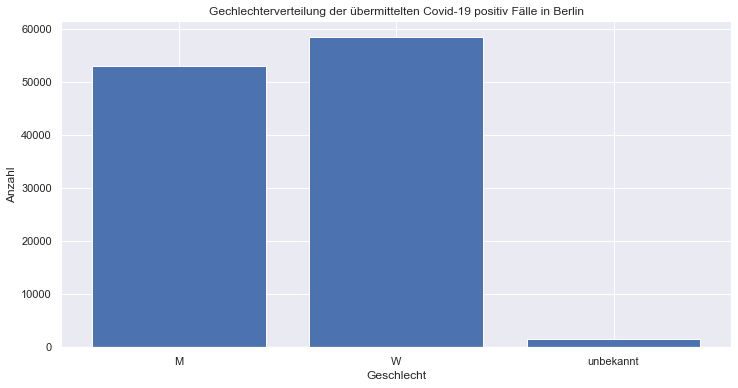

In [177]:
### 2.1
berlin_cases = berlin[['Geschlecht', 'AnzahlFall']]

### 2.2
berlin_cases_sex = berlin_cases.groupby('Geschlecht').sum().reset_index()

### 2.3
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.bar(berlin_cases_sex['Geschlecht'], berlin_cases_sex['AnzahlFall'])
ax.set_xlabel('Geschlecht')
ax.set_ylabel('Anzahl')
ax.set_title('Gechlechterverteilung der übermittelten Covid-19 positiv Fälle in Berlin')
plt.show()

**3) Plot the Covid-19 cases by age group in Berlin and Mecklenburg-Vorpommern.**

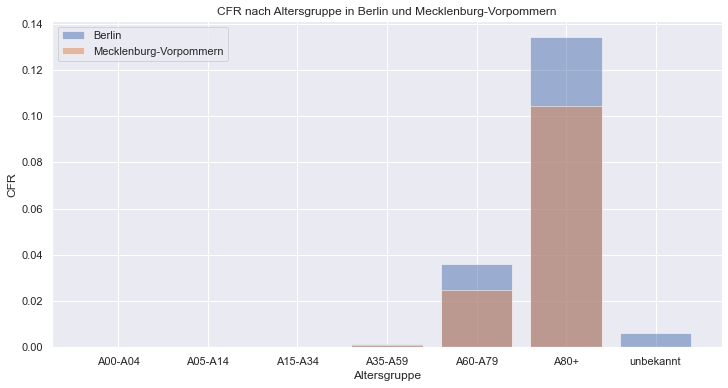

In [178]:
### 3.1
berlin_cases = berlin[['Altersgruppe','AnzahlFall']]
berlin_ceased = berlin[['Altersgruppe','AnzahlTodesfall']]

mv_cases = mv[['Altersgruppe','AnzahlFall']]
mv_ceased = mv[['Altersgruppe','AnzahlTodesfall']]

### 3.2
berlin_cases_age = berlin_cases.groupby('Altersgruppe')['AnzahlFall'].sum().reset_index()
berlin_ceased_age = berlin_ceased.groupby('Altersgruppe')['AnzahlTodesfall'].sum().reset_index()
berlin_cfr_age = berlin_ceased_age['AnzahlTodesfall'] / berlin_cases_age['AnzahlFall']

mv_cases_age = mv_cases.groupby('Altersgruppe')['AnzahlFall'].sum().reset_index()
mv_ceased_age = mv_ceased.groupby('Altersgruppe')['AnzahlTodesfall'].sum().reset_index()
mv_cfr_age = mv_ceased_age['AnzahlTodesfall'] / mv_cases_age['AnzahlFall']

### 3.3
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(berlin_ceased_age['Altersgruppe'], berlin_cfr_age, alpha=0.5, label='Berlin')
ax.bar(mv_ceased_age['Altersgruppe'], mv_cfr_age, alpha=0.5, label='Mecklenburg-Vorpommern')
ax.set_xlabel('Altersgruppe')
ax.set_ylabel('CFR')
ax.set_title('CFR nach Altersgruppe in Berlin und Mecklenburg-Vorpommern')
ax.legend()
plt.show()


**4) Plot the total CFR in Berlin and Mecklenburg-Vorpommern.**

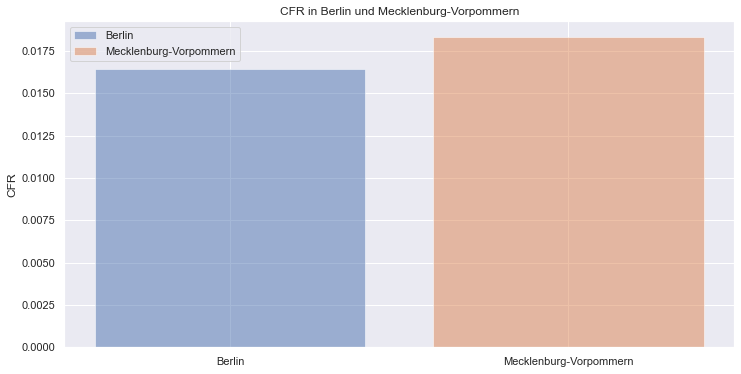

In [180]:
### 4.1
berlin_cfr = berlin['AnzahlTodesfall'].sum() / berlin['AnzahlFall'].sum()
mv_cfr = mv['AnzahlTodesfall'].sum() / mv['AnzahlFall'].sum()

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.bar(0, berlin_cfr, alpha=0.5, label='Berlin')
ax.bar(1, mv_cfr, alpha=0.5, label='Mecklenburg-Vorpommern')
ax.set_xticks([0,1])
ax.set_xticklabels(['Berlin', 'Mecklenburg-Vorpommern'])
ax.set_ylabel('CFR')
ax.set_title('CFR in Berlin und Mecklenburg-Vorpommern')
ax.legend()
plt.show()

4.2:<br>
Although, the CFR per age group is lower in Mecklenburg-Vorpommern compared to Berlin, the total CFR is almost twice as high. This phenomenon is known in statistics as *Simpson's paradox*. Where trends appear when comparing different groups which then disappear or reverse when the groups are combined. To resolve this problem, the causal relations have to be addressed. The reason here is the difference in the age distributions of Covid19 patients in the two states. As you can see from the plot below, the number of 'older' patients in Mecklenburg-Vorpommern is relatively higher compared to Berlin, leading to a higher overall CFR.

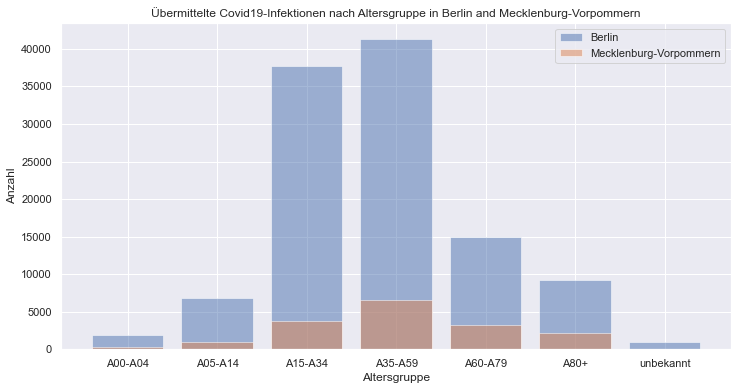

In [165]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.bar(berlin_cases_age['Altersgruppe'], berlin_cases_age['AnzahlFall'], alpha=0.5, label='Berlin')
ax.bar(mv_cases_age['Altersgruppe'], mv_cases_age['AnzahlFall'], alpha=0.5, label='Mecklenburg-Vorpommern')
ax.set_xlabel('Altersgruppe')
ax.set_ylabel('Anzahl')
ax.set_title('Übermittelte Covid19-Infektionen nach Altersgruppe in Berlin and Mecklenburg-Vorpommern')
ax.legend()
plt.show()

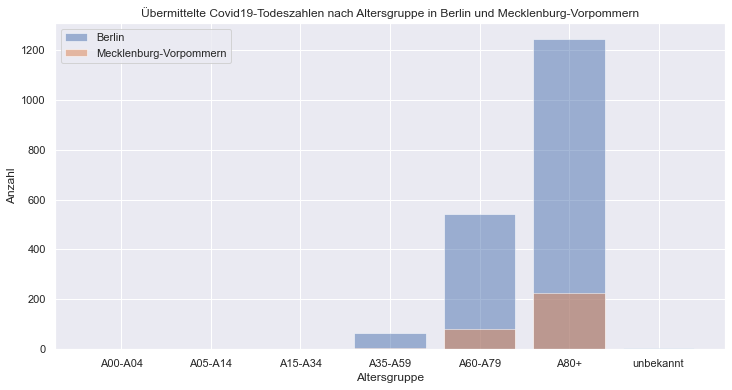

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.bar(berlin_ceased_age['Altersgruppe'], berlin_ceased_age['AnzahlTodesfall'], alpha=0.5, label='Berlin')
ax.bar(mv_ceased_age['Altersgruppe'], mv_ceased_age['AnzahlTodesfall'], alpha=0.5, label='Mecklenburg-Vorpommern')
ax.set_xlabel('Altersgruppe')
ax.set_ylabel('Anzahl')
ax.set_title('Übermittelte Covid19-Todeszahlen nach Altersgruppe in Berlin und Mecklenburg-Vorpommern')
ax.legend()
plt.show()

**5) Plot the number of daily Covid-19 infections in Berlin over time.**

In [18]:
### 5.1
berlin_cases = berlin[['AnzahlFall','Meldedatum']]
### 5.2
berlin_daily_cases = berlin_cases.groupby('Meldedatum').sum()
### 5.3
berlin_daily_cases = berlin_daily_cases.reset_index()

### 5.4
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(berlin_daily_cases['Meldedatum'],berlin_daily_cases['AnzahlFall'])
ax.set_xlabel('Meldedatum')
ax.set_ylabel('Anzahl')
ax.set_title('Verlauf der übermittelten täglichen Covid-19 Infektionen in Berlin')
plt.show()

**6) Plot the cumulative cases by age group over time.**

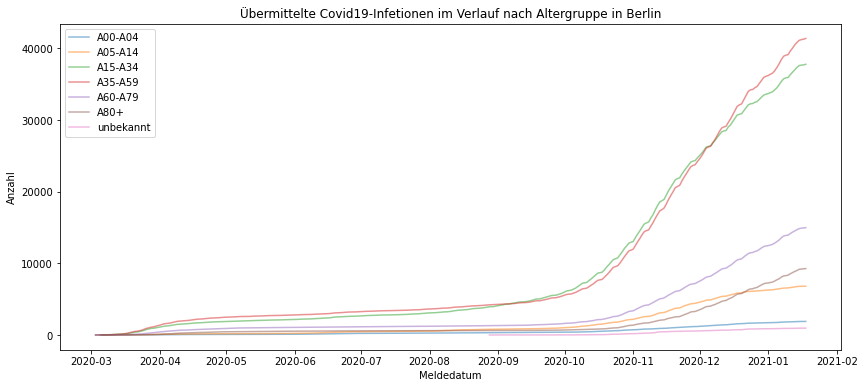

In [128]:
### 6.1
berlin_cases = berlin[['Altersgruppe','AnzahlFall','Meldedatum']]
### 6.2
berlin_cases_grouped = berlin_cases.groupby(['Altersgruppe','Meldedatum'])['AnzahlFall'].sum()
### 6.3
berlin_cases_cum = berlin_cases_grouped.groupby(level=0).cumsum()
### 6.4
berlin_cases_cum = berlin_cases_cum.reset_index()
### 6.5
age_groups = berlin_cases_cum['Altersgruppe'].unique()
### 6.6
fig, ax= plt.subplots(1, 1, figsize=(14,6))

for age_group in age_groups:
    x = berlin_cases_cum[berlin_cases_cum['Altersgruppe']==age_group]['Meldedatum']
    y = berlin_cases_cum[berlin_cases_cum['Altersgruppe']==age_group]['AnzahlFall']
    ax.plot(x,y,label=age_group, alpha=0.5)

ax.set_xlabel('Meldedatum')
ax.set_ylabel('Anzahl')
ax.set_title('Übermittelte Covid19-Infetionen im Verlauf nach Altergruppe in Berlin')
ax.legend()
plt.show()

**7) Plot the distributions of daily reported Covid-19 cases in Berlin and Brandenburg. Interpret the results.**

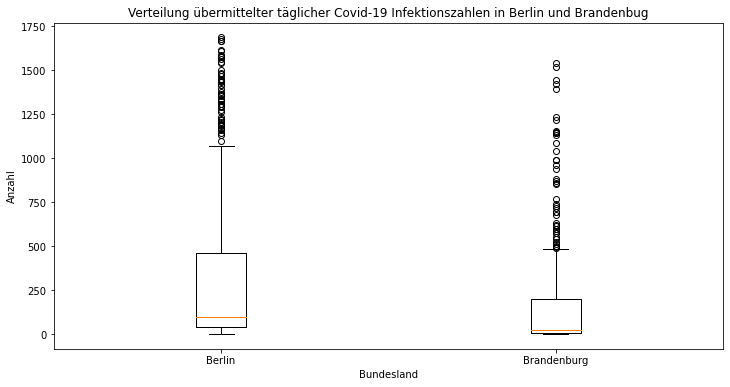

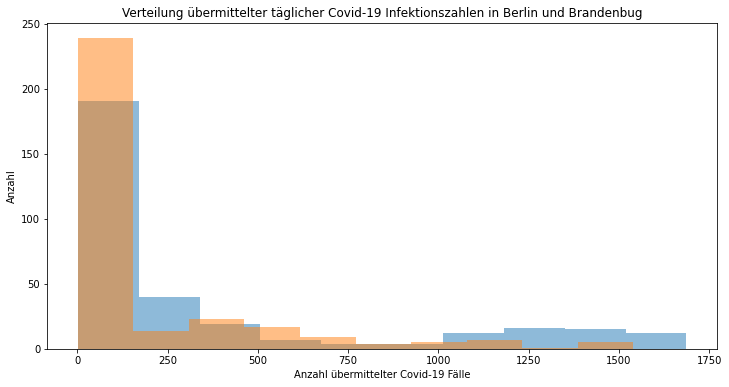

In [53]:
### 7.1
berlin = covid19[covid19['Bundesland']=='Berlin']
berlin_cases = berlin[['Meldedatum', 'AnzahlFall']]
berlin_cases_daily = berlin_cases.groupby('Meldedatum').sum().reset_index()

brandenburg = covid19[covid19['Bundesland']=='Brandenburg']
brandenburg_cases = brandenburg[['Meldedatum', 'AnzahlFall']]
brandenburg_cases_daily = brandenburg_cases.groupby('Meldedatum').sum().reset_index()

### 7.2 (Boxplot)
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.boxplot(berlin_cases_daily['AnzahlFall'], positions=[0])
ax.boxplot(brandenburg_cases_daily['AnzahlFall'], positions=[1])
ax.set_xticklabels(['Berlin', 'Brandenburg'])

ax.set_xlabel('Bundesland')
ax.set_ylabel('Anzahl')
ax.set_title('Verteilung übermittelter täglicher Covid-19 Infektionszahlen in Berlin und Brandenbug')
plt.show()

### alternatively: Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.hist(berlin_cases_daily['AnzahlFall'], alpha=0.5)
ax.hist(brandenburg_cases_daily['AnzahlFall'], alpha=0.5)

ax.set_xlabel('Anzahl übermittelter Covid-19 Fälle')
ax.set_ylabel('Anzahl')
ax.set_title('Verteilung übermittelter täglicher Covid-19 Infektionszahlen in Berlin und Brandenbug')
plt.show()

7.3: 

The distributions of reported daily Covid-19 cases show an overall lower absolute number of cases in Brandenburg, as indicated the Median and the box. Both distributions are right-skewed due to low rates of infection. Large numbers of infection result from the exponential growth in the 'second-wave'. 

## Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but it comes with drawbacks:

- defaults are not exactly the best choices,
- API is relatively low level,
- lacking compatability with *pandas DataFrame*s

Adressing these drawbacks, *Seaborn* is statistical plotting library build on top of *matplotlib* and provides an API that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and provides a close integration with *pandas* data structures.
<br><br>

<center><i>“If matplotlib ’tries to make easy things easy and hard things possible’, seaborn tries to make a well-defined set of hard things easy too.”</center>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Michael Waskom, Introduction to Seaborn

Behind the scenes, *Seaborn* uses matplotlib to draw plots; so, if you know *matplotlib*, you’re already halfway through *Seaborn*. Many tasks can be accomplished with only seaborn functions, but further customization might require using *matplotlib* directly. 

<img src="https://www.datacouncil.ai/hs-fs/hubfs/DataEngConf/NYC16/OSS%20Projects/Seaborn-Logo_256px.png?width=256&name=Seaborn-Logo_256px.png" width="20%">

*Source: https://www.datacouncil.ai/hs-fs/hubfs/DataEngConf/NYC16/OSS%20Projects/Seaborn-Logo_256px.png?width=256&name=Seaborn-Logo_256px.png*

### Installation

For an installation of the *Seaborn* library, you have to enter the following command in the terminal.

```python
!pip install seaborn
```

### Importing the library

A library is imported using the command import. In the following, we will call the library ```sns```.


In [54]:
# Laden der seaborn library
import seaborn as sns

# Default seaborn theme
sns.set()

### Getting started!

Let's have a look at some of the drawbacks of *matplotlib* and how *Seaborn* adresses these.

#### Close integration with *pandas*

As mentioned before, *Seaborn* is closely integrated with *pandas DataFrame*s; so, for most of the functions you simply specify your data set in your plotting function and call a variable by using its header/column name. 

In [56]:
# Convert our toy data set into a dataframe
df = pd.DataFrame({'x': x, 'y': y})

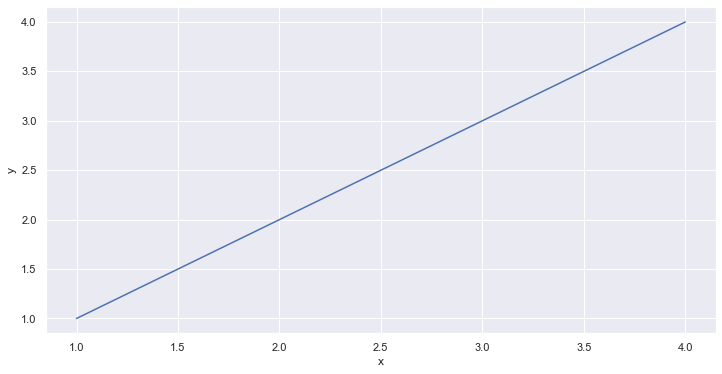

In [57]:
# Line plot
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.lineplot(data=df,
             x='x',
             y='y', 
             ax=ax)

plt.show()

Here, another example of the close integration with *pandas* can be seen in the plot; *Seaborn* loads the full data set and uses the selected header/column names as axis labels.

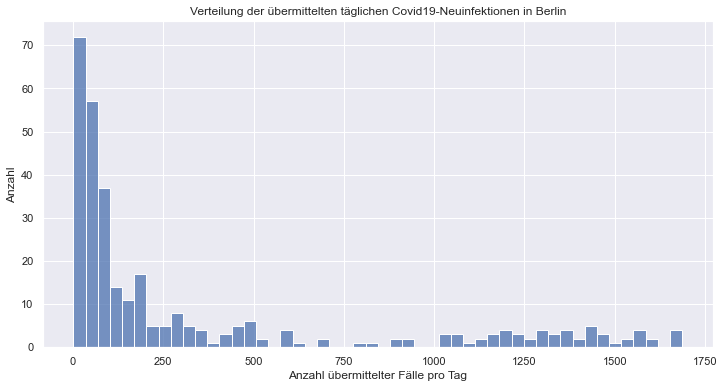

In [140]:
berlin_cases = berlin.groupby('Meldedatum')['AnzahlFall'].sum().reset_index()

# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(x='AnzahlFall', data=berlin_cases, bins=50, ax=ax)
ax.set_xlabel('Anzahl übermittelter Fälle pro Tag')
ax.set_ylabel('Anzahl')
ax.set_title('Verteilung der übermittelten täglichen Covid19-Neuinfektionen in Berlin')
plt.show()

In ``Seaborn``, the ``hue`` parameters allows to easily compare different groups. This parameter determines which column in the data frame should be used for colour encoding. 

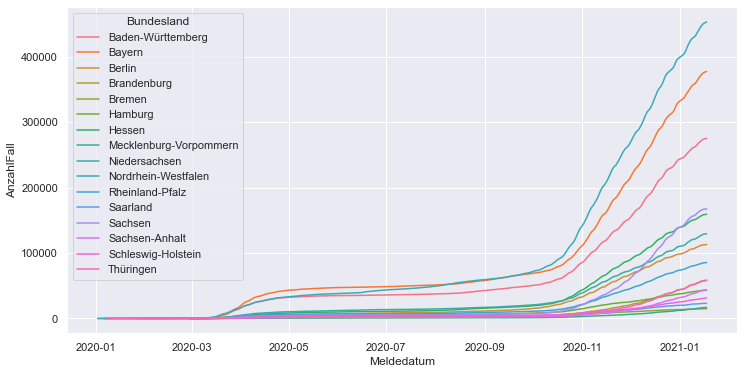

In [147]:
# Calculate cumulative cases
cases = covid19[['Bundesland', 'AnzahlFall', 'Meldedatum']].groupby(
    ['Bundesland','Meldedatum'])['AnzahlFall'].sum()
cases_cum = cases.groupby(level=0).cumsum()
cases_cum = cases_cum.reset_index()

# Plot cumulative cases for all states over time
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.lineplot(x='Meldedatum', y='AnzahlFall', data=cases_cum, hue='Bundesland')
plt.show()

#### High-level functions

In *matplotlib*, tasks like plotting counts for categorical data, like you did in ex.1 and ex.2, is tedious. First, you have to count your categories and then pass these to the bar plot function. In contrast, *Seaborn* provides high-level functions for these tasks which will do all the work for you. Let's create the plot from ex.2.

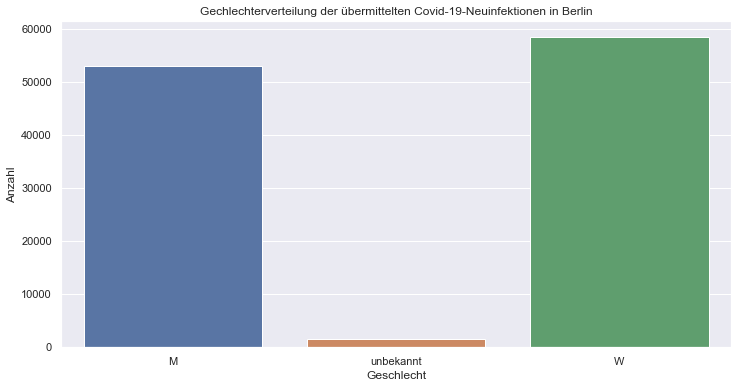

In [105]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(data=berlin,
            y='AnzahlFall',
            x='Geschlecht',
            #hue='Altersgruppe',
            estimator=sum, 
            ci=False, 
            ax=ax)

ax.set_title('Gechlechterverteilung der übermittelten Covid-19-Infektionen in Berlin')
ax.set_ylabel('Anzahl')
plt.show()

We see that we don't have to build a subset for every category like in *matplotlib*, we can simply split the data by passing a conditioning variable to the argument *hue*.

A small list of *Seaborn* functions:

- **Boxplot:** sns.boxplot(x)
- **Violin Plot:** sns.violinplot(x)
- **Bar Plot:** sns.barplot(x,y)
- **Line Plot:** sns.lineplot(x,y)
- **Scatter Plot:** sns.scatterplot(x,y)
- **Faceted Scatter Plot:** sns.relplot(x,y)
- **Scatter Plot with regression line:** sns.lmplot(x,y)
- **KDE Plot:** sns.kde(x,y)

Visualizations with multiple plots

- **Scatter Plot with histograms:** sns.jointplot(x,y)
- **Scatter Plot Matrix:** sns.pairplot(df[['x','y',...]])
- ...

Optimized function for plotting categorical data:
- **Plotting categorical data:** 
    - sns.catplot(x,y,kind) *(kind=['swarm', 'violin', 'boxplot'])*
    - sns.sns.stripplot(x,y)
    - sns.swarmplot(x,y)

Check out the tutorial or the gallery for more examples.

https://seaborn.pydata.org/tutorial.html

https://seaborn.pydata.org/examples/index.html